<a href="https://colab.research.google.com/github/nguyennhatquan/8-Week-SQL-Challenge/blob/main/Cleaning_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Import data and library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install recordlinkage

     |████████████████████████████████| 944 kB 31.1 MB/s 
     |████████████████████████████████| 132 kB 50.5 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73972 sha256=313b9ac35ae0feb9316c882daa32b5d03c0c44bfb51bd85e5e6aebe025f1778f
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import recordlinkage

In [ ]:
path = "/content/drive/MyDrive/Datasets/ride_sharing_new.csv"
ride_sharing = pd.read_csv(path, index_col = 'Unnamed: 0')

path = "/content/drive/MyDrive/Datasets/airlines_final.csv"
airlines = pd.read_csv(path, index_col = 'Unnamed: 0')

path = "/content/drive/MyDrive/Datasets/banking_dirty.csv"
banking = pd.read_csv(path, index_col = 'Unnamed: 0')

path = "/content/drive/MyDrive/Datasets/restaurants_L2.csv"
restaurants = pd.read_csv(path, index_col = 'Unnamed: 0')

path = "/content/drive/MyDrive/Datasets/restaurants_L2_dirty.csv"
restaurants_new = pd.read_csv(path, index_col = 'Unnamed: 0')

# Check if data is imported properly
display(ride_sharing.head())
display(airlines.head())
display(banking.head())
display(restaurants.head())
display(restaurants_new)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...
77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
79,matsuhissa,129 n. la cienega blvd.,beverly hills,3106599639,asian
80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


# Don't know where to start?


Try completing these tasks:
- For each DataFrame, inspect the data types of each column and, where needed, clean and convert columns into the correct data type. You should also rename any columns to have more descriptive titles.
- Identify and remove all the duplicate rows in `ride_sharing`.
- Inspect the unique values of all the columns in `airlines` and clean any inconsistencies.
- For the `airlines` DataFrame, create a new column called `International` from `dest_region`, where values representing US regions map to `False` and all other regions map to `True`.
- The `banking` DataFrame contains out of date ages. Update the `Age` column using today's date and the `birth_date` column.
- Clean the `restaurants_new` DataFrame so that it better matches the categories in the `city` and `type` column of the `restaurants` DataFrame. Afterward, given typos in restaurant names, use record linkage to generate possible pairs of rows between `restaurants` and `restaurants_new` using criteria you think is best.

# Deal with Common Data Problems

## Data Type constraints

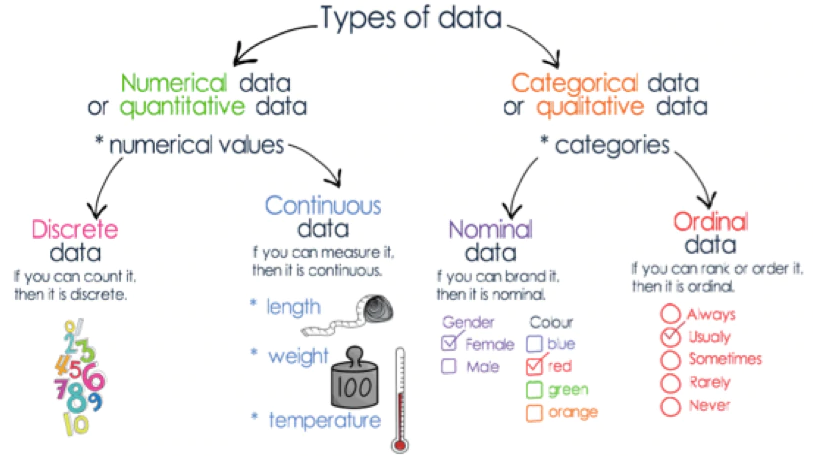
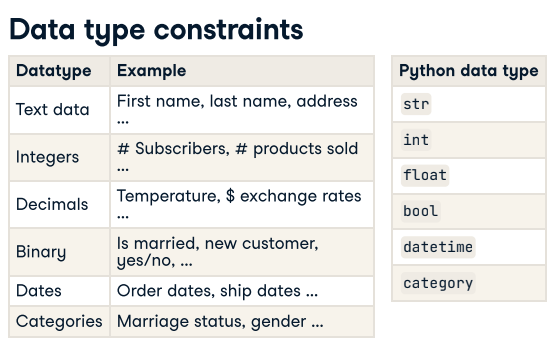

### Inspect the data types of each DataFrame columns

- `Dataframe.info()` -> Return # of Non-numm values + Column data types
- `Dataframe.dtypes` -> Return only columns data types

In [ ]:
print(airlines.dtypes)
print('\n')
airlines.head()

id                 int64
day               object
airline           object
destination       object
dest_region       object
dest_size         object
boarding_area     object
dept_time         object
wait_min         float64
cleanliness       object
safety            object
satisfaction      object
dtype: object




,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
print(banking.dtypes)
print('\n')
banking.head()

cust_id                     object
birth_date                  object
Age                          int64
acct_amount                float64
inv_amount                   int64
fund_A                     float64
fund_B                     float64
fund_C                     float64
fund_D                     float64
account_opened              object
last_transaction            object
birthdate           datetime64[ns]
dtype: object




,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,birthdate
0,870A9281,1962-06-09,60,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,1962-06-09
1,166B05B0,1962-12-16,60,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,1962-12-16
2,BFC13E88,1990-09-12,32,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,1990-09-12
3,F2158F66,1985-11-03,37,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,1985-11-03
4,7A73F334,1990-05-17,32,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,1990-05-17


In [ ]:
print(ride_sharing.dtypes)
print('\n')
ride_sharing.head()

duration             object
station_A_id          int64
station_A_name       object
station_B_id          int64
station_B_name       object
bike_id               int64
user_type          category
user_birth_year       int64
user_gender          object
duration_trim        object
duration_time         int64
dtype: object




,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,duration_trim,duration_time
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,12,12
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,24,24
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,8,8
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,4,4
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,11,11


In [ ]:
print(restaurants.dtypes)
print('\n')
restaurants.head()

name     object
addr     object
city     object
phone     int64
type     object
dtype: object




,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [ ]:
print(restaurants_new.dtypes)
print('\n')
restaurants.head()

name     object
addr     object
city     object
phone     int64
type     object
dtype: object




,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


### Clean and Convert columns data types

#### Convert to Category data type

The data type of `user_type` in ride_sharing seem to be incorrect.

The `int64` data type may not allow us to gain helpful statistic cal insights from this column as follows 

In [ ]:
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

Because the "user_type" field contains a finite set of values, we must convert this column from "integer" to "category"

In [ ]:
ride_sharing['user_type'] = ride_sharing['user_type'].astype('category')

# This will raise error if the conditional statement is False
assert ride_sharing['user_type'].dtype == 'category'

ride_sharing['user_type'].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64

Now we know that the majority of `user_type` is type 2

#### Summing Strings & Concatenating Numbers

The `duration` field can provide us with helpfull statisical insights if it's converted to "integer".

To do that, we must strip the "minutes" from values

In [ ]:
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip(' minutes')
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

assert ride_sharing['duration_time'].dtype == 'int'

ride_sharing['duration_time'].mean()

11.389052795031056

Now we know that the average time for a ride is 11 minutes, which is not bad at all considering the locations

## Data Range Constraints

### Numeric Range

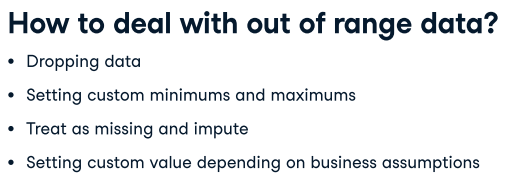

> **Best Practice**

Two quick ways to deal with out-of-range data depending on the business rules:
1. Set new values
        ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27
2. Drop values
  * Drop by filtering
          ride_sharing = ride_sharing[ride_sharing['tire_sizes'] <= 27]
  * Drop by using drop()
          ride_sharing.drop(ride_sharing[ride_sharing['tire_sizes'] > 27].index, inplace=True)



Assuming we have a "tire_size" fields that could be either 26″, 27″ or 29″ and is here correctly stored as a categorical value. 

In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″. 

We'll set the "tire_size" to be in the correct range as follows:

    #Convert tire_sizes to integer
    ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

    #Set all values above 27 to 27
    ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

    #Reconvert tire_sizes back to categorical
    ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

    #Print tire size description
    print(ride_sharing['tire_sizes'].describe())

### Date Range

> **Best Practice**

When checking for range of dates, it's important to make sure our data doesn't contain any future days depending on the business rules

To cope with this problem, we might
1. Firstly convert the values into `datetime` object using `pd.to_datetime()`
2. Replacle future days with proper values (e.g. today's date)

        # Convert ride_date to datetime
        ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

        # Save today's date
        today = dt.date.today()

        # Set all in the future to today's date
        ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

        # Print maximum of ride_dt column
        print(ride_sharing['ride_dt'].max())

## Uniqueness Constraints

###Identify duplicates

> **Best Practice**

Remember to specify the arguments of `DataFrame.duplicated()` method to avoid misleading results. By default, it only looks for "complete duplicates", i.e., records having duplicates in all fields

`subset`: List of column names to check for duplication

`keep`: Whether to mark first, last, or all (False) duplicates as True

In [ ]:
duplicate = ride_sharing.duplicated(keep=False)
ride_sharing[duplicate].sort_values(by='duration')

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,duration_trim,duration_time
7610,10 minutes,30,San Francisco Caltrain (Townsend St at 4th St),6,The Embarcadero at Sansome St,4442,1,1967,Male,10,10
18303,10 minutes,30,San Francisco Caltrain (Townsend St at 4th St),6,The Embarcadero at Sansome St,4442,1,1967,Male,10,10
9696,17 minutes,22,Howard St at Beale St,102,Irwin St at 8th St,492,3,1961,Female,17,17
15217,17 minutes,22,Howard St at Beale St,102,Irwin St at 8th St,492,3,1961,Female,17,17
9724,4 minutes,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male,4,4
20170,4 minutes,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male,4,4
566,9 minutes,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male,9,9
604,9 minutes,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male,9,9


Although the "airlines" dataframe has no duplicates, its index is inconsistent with the number of records

> **Best Practice**

Use `Series/DataFrame.any()` along with `assert` to check if any duplicate is contained

In [ ]:
assert airlines.duplicated(keep=False).any() == False # Check for complete duplicates
assert airlines.index.duplicated(keep=False).any() == False # Check for duplicates in index column

airlines_new = airlines.reset_index(drop=True) # Reset index + drop exising index column
airlines_new 

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


###Treat complete duplicates

#### Drop complete duplicates

 Use `DataFrame.drop_duplicates()` method

`subset`: List of column names to check for duplication

`keep`: 
* 'first': drop all duplicates except the first occurence (Default)
* 'last': drop all duplicates except the last occurence
* False: drop all duplicates

`inplace`: Make changes directly to the DataFrame

In [ ]:
ride_sharing_new = ride_sharing.drop_duplicates(keep='first') # Keep the first occurence
assert ride_sharing_new.duplicated(keep=False).any() == False 

####Aggregate incomplete duplicates

> **Best Practice**

For incomplete duplicates, we'll merge them together using different aggregate functions based the nature of each field

E.g.:

    # Drop complete duplicates from ride_sharing
    ride_dup = ride_sharing.drop_duplicates(keep='first')

    # Create statistics dictionary for aggregation function
    statistics = {'user_birth_year': 'min', 'duration': 'mean'}

    # Group by ride_id and compute new statistics
    ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

    # Check for duplicated values again
    assert ride_unique.duplicated(subset = 'ride_id', keep = False).any() == False


#Text & Categorical data problems

## Membership constraints

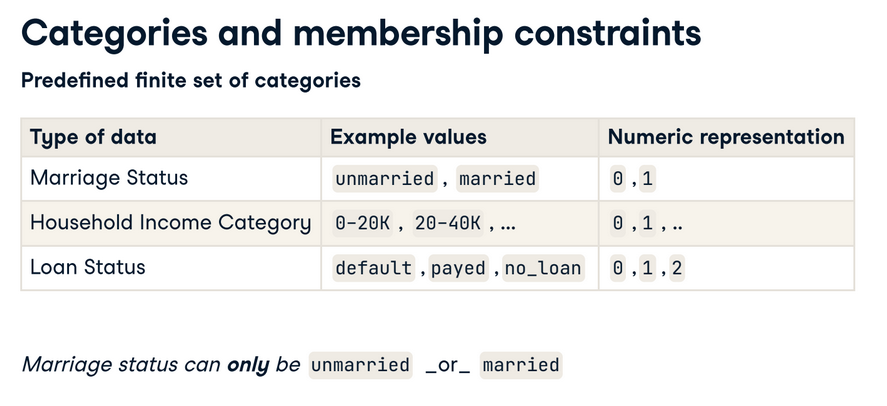
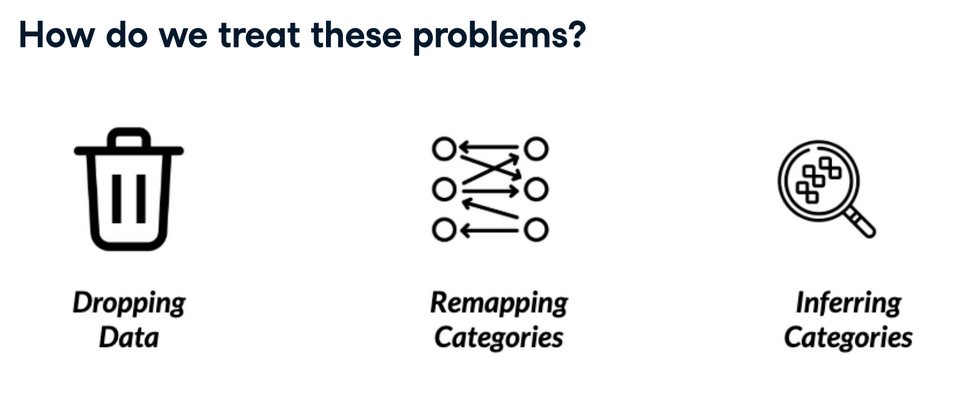

*Example: Assuming we have an inconsistent category in our DataFrame and correct data to infer from*

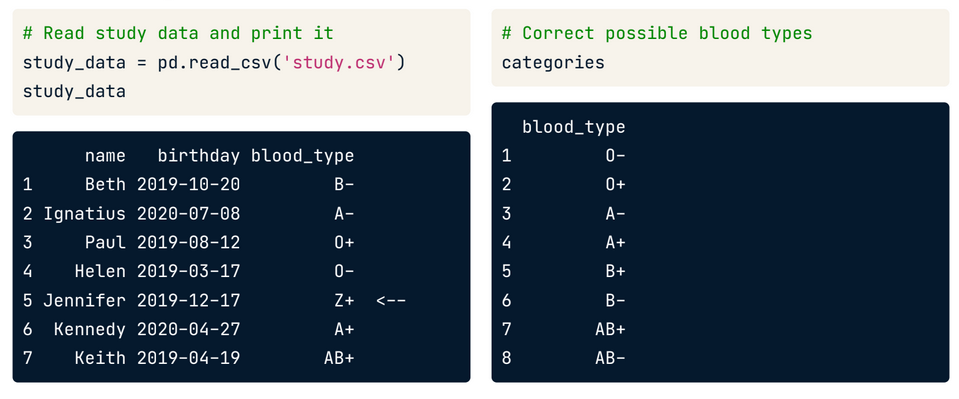
> **Best Practice**

Use the following method:

* set() 

* Set.difference()

* DataFrame.isin()

1. Identify inconsistent categories
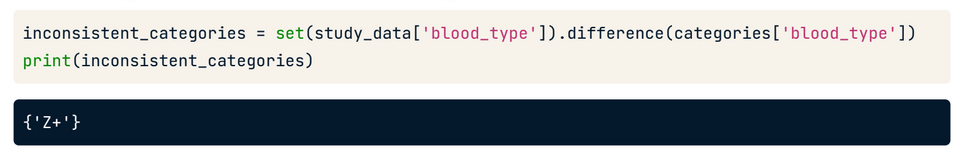
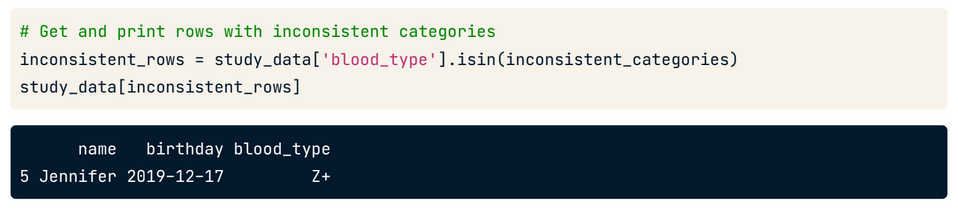
2. Dropping inconsistent categories
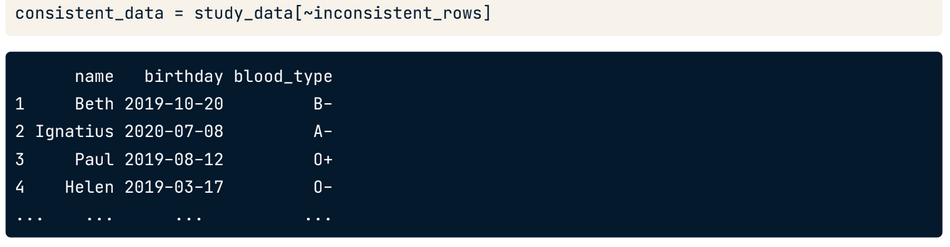

##Categorical variables constraints

### Value inconsistency

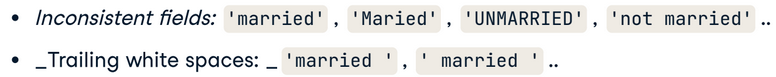

> **Best Practice**

Use `DataFrame.unique()` or `DataFrame.value_counts()` to check for inconsistencies

Use the following string method to fix inconsistent values:

* `Series.str.upper() `
* `Series.str.lower()`
* `Series.str.strip()`

In [ ]:
check_column = ['day','dest_region','dest_size','cleanliness','safety','satisfaction']
for i in check_column:
    print(airlines_new[i].unique())
    print('\n')

['Tuesday' 'Friday' 'Thursday' 'Wednesday' 'Saturday' 'Sunday' 'Monday']


['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']


['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty']


['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe']


['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied']




It's clear that two columns `dest_size` and `dest_region`containing inconsistent values



In [ ]:
airlines_new['dest_size'] = airlines_new['dest_size'].str.strip()
airlines_new['dest_region'] = airlines_new['dest_region'].str.lower()
airlines_new['dest_region'] = airlines_new['dest_region'] .replace({'eur':'europe'})

display(airlines_new['dest_region'].value_counts())
print('\n') 
display(airlines_new['dest_size'].value_counts())

west us                  864
east us                  436
europe                   351
midwest us               251
asia                     226
canada/mexico            198
middle east               69
australia/new zealand     60
central/south america     22
Name: dest_region, dtype: int64

Hub       1550
Medium     600
Small      200
Large      127
Name: dest_size, dtype: int64

###Collapsing data into categories

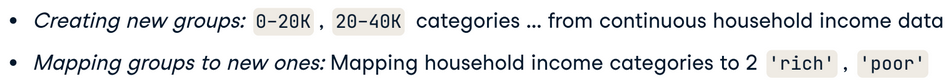

####Create categories out of data

> **Best Practice**

Use the following method to create categories

* `pd.qcut()`: categorize data based on number of specified quantiles
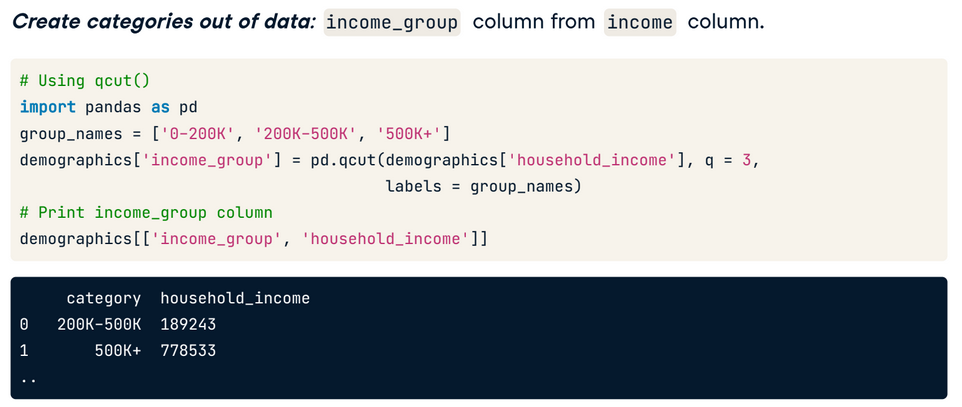
* `pd.cut()`: categorize data based on number of bins
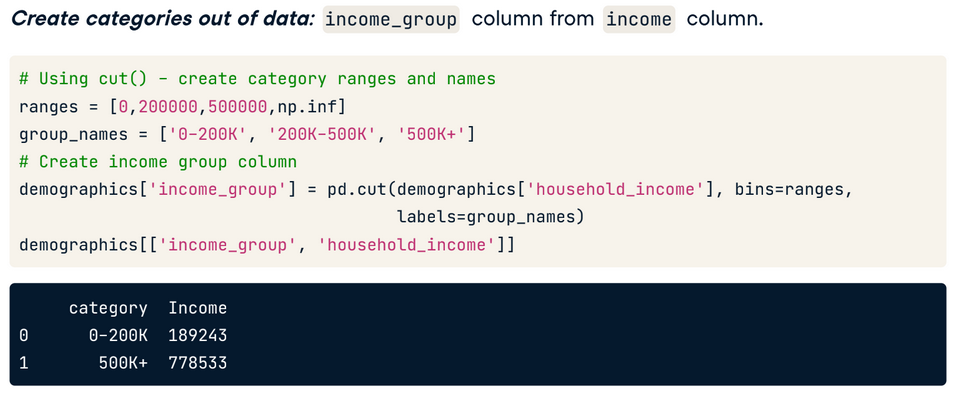

####Map categories to fewer ones

> **Best Practice**

Use `DataFrame.replace()`

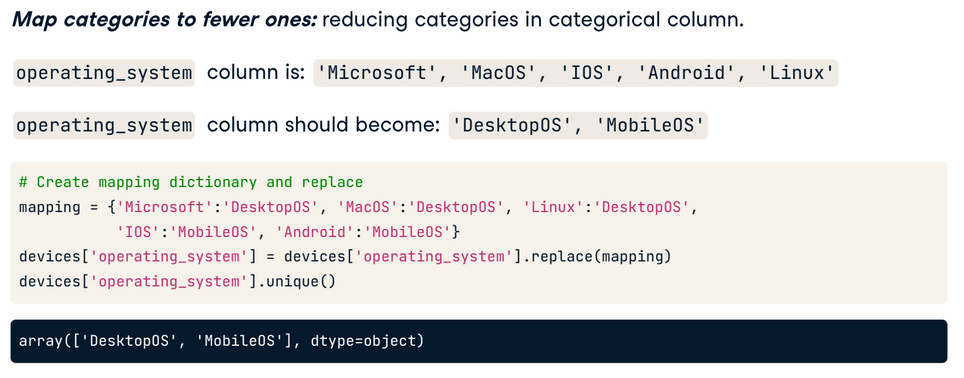

For the `airlines` DataFrame, create a new column called `International` from `dest_region`, where values representing US regions map to `False` and all other regions map to `True`.

In [ ]:
US_region = ['west us','east us','midwest us']

for i in range(airlines_new.shape[0]):
  if airlines_new.loc[i,'dest_region'] in US_region:
    airlines_new.loc[i,'International'] = False
  else:
    airlines_new.loc[i,'International'] = True

airlines_new['International'].value_counts()

False    1551
True      926
Name: International, dtype: int64

#### Make sure data is of type `category`


In [ ]:
check_column = ['day','dest_region','dest_size','cleanliness','safety','satisfaction','International']
for i in check_column:
    airlines_new[i] = airlines_new[i].astype('category')
    assert airlines_new[i].dtype == 'category'
airlines_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             2477 non-null   int64   
 1   day            2477 non-null   category
 2   airline        2477 non-null   object  
 3   destination    2477 non-null   object  
 4   dest_region    2477 non-null   category
 5   dest_size      2477 non-null   category
 6   boarding_area  2477 non-null   object  
 7   dept_time      2477 non-null   object  
 8   wait_min       2477 non-null   float64 
 9   cleanliness    2477 non-null   category
 10  safety         2477 non-null   category
 11  satisfaction   2477 non-null   category
 12  International  2477 non-null   category
dtypes: category(7), float64(1), int64(1), object(4)
memory usage: 134.8+ KB


## Text variables constraints

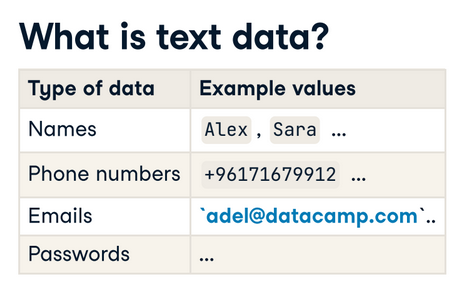

#### Data inconsistency

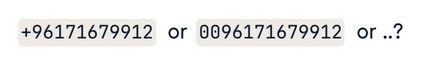

> **Best Practice**

Use `DataFrame.unique()` or `DataFrame.value_counts()` to check for inconsistencies

Use the following method to fix inconsistent values:

* `Series.str.replace() `
* `Series.str.contains()`

  Note of how regular expressions are used

      airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.')

* `Series.any()`



      # Replace "Dr." with empty string ""
      airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

      # Replace "Mr." with empty string ""
      airlines['full_name'] = airlines['full_name'].str.replace("Mr.", "")

      # Replace "Miss" with empty string ""
      airlines['full_name'] = airlines['full_name'].str.replace("Miss", "")

      # Replace "Ms." with empty string ""
      airlines['full_name'] = airlines['full_name'].str.replace("Ms.", "")

      # Assert that full_name has no honorifics
      assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

#### Fixed length violations

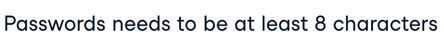

Assuming you want to only have customers responses that has more than 40 characters

> **Best Practice**

Here are some useful methods:

* `Series.str.len()`
* `Series.min()`


    # Store length of each row in survey_response column
    resp_length = airlines['survey_response'].str.len()

    # Find rows in airlines where resp_length > 40
    airlines_survey = airlines[resp_length > 40]

    # Assert minimum survey_response length is > 40
    assert airlines_survey['survey_response'].str.len().min() > 40

    # Print new survey_response column
    print(airlines_survey['survey_response'])

Also, you can also replace violated datas with `np.nan`
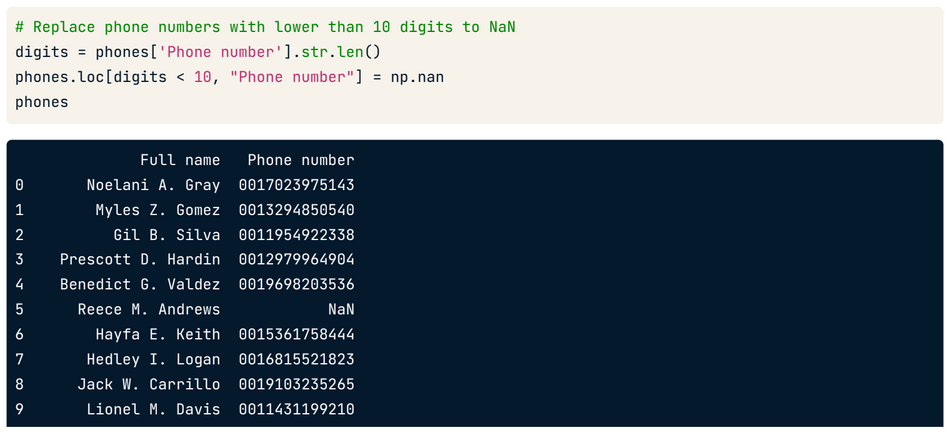

#### Typos

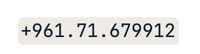

> **Best Practice**

Make use of the above methods + **Regular Expression** to solve this error

# Advanced Data Problems

## Uniformity


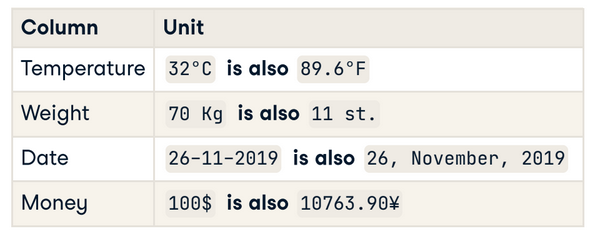

### Uniform units/currencies

> **Best Practice**

Simply transform values into uniform ones
    # Find values of acct_cur that are equal to 'euro'
    acct_eu = banking['acct_cur'] == 'euro'

    # Convert acct_amount where it is in euro to dollars
    banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

    # Unify acct_cur column by changing 'euro' values to 'dollar'
    banking.loc[acct_eu, 'acct_cur'] = 'dollar'

    # Assert that only dollar currency remains
    assert banking['acct_cur'].unique() == 'dollar'

### Uniform dates

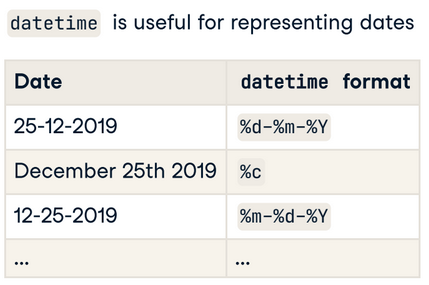

> **Best Practice**

**Treating date data**
* Use `pandas.to_datetime()` to convert a `Series` object to `datetime` object
  - Can recognize most format automatically
  - Sometimes fails with erroneous or unrecognizable formats

        # Convert account_opened to datetime
        banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                                      # Infer datetime format
                                                      infer_datetime_format = True,
                                                      # Return missing value for error
                                                      errors = 'coerce')

* Use `datetime.year` to access the year attribute of `datetime` object

**Treating ambiguous date data**

E.g., is `2019-03-08` in August or March?

* Convert to `Nan` & treat accordingly
* Infer format by understanding data source
* Infer formate by understanding previous and subsequent data in DataFrame

The `banking` DataFrame contains out of date ages. Update the `Age` column using today's date and the `birth_date` column.

In [ ]:
today_year = dt.date.today().year
print(today_year)

2022



> **Note**

* `DataFrame.applymap()`: Apply a function to a Dataframe **elementwise**
* `DataFrame.apply()`: Apply a function **along an axis** of the DataFrame.
* `Series.apply()`: Apply a function on **values** of Series

In [ ]:
banking['birthdate'] = pd.to_datetime(banking['birth_date'])
birthday_year = banking['birthdate'].apply(lambda x :x.year)
# Or birthday_year = banking.birthdate.dt.year
print(birthday_year)

0     1962
1     1962
2     1990
3     1985
4     1990
      ... 
95    1974
96    1989
97    1984
98    1969
99    1993
Name: birthdate, Length: 100, dtype: int64


In [ ]:
banking.Age = today_year - birthday_year
display(banking.Age)
display(banking.head())

0     60
1     60
2     32
3     37
4     32
      ..
95    48
96    33
97    38
98    53
99    29
Name: Age, Length: 100, dtype: int64

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,birthdate
0,870A9281,1962-06-09,60,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,1962-06-09
1,166B05B0,1962-12-16,60,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,1962-12-16
2,BFC13E88,1990-09-12,32,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,1990-09-12
3,F2158F66,1985-11-03,37,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,1985-11-03
4,7A73F334,1990-05-17,32,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,1990-05-17


## Cross-field Validation

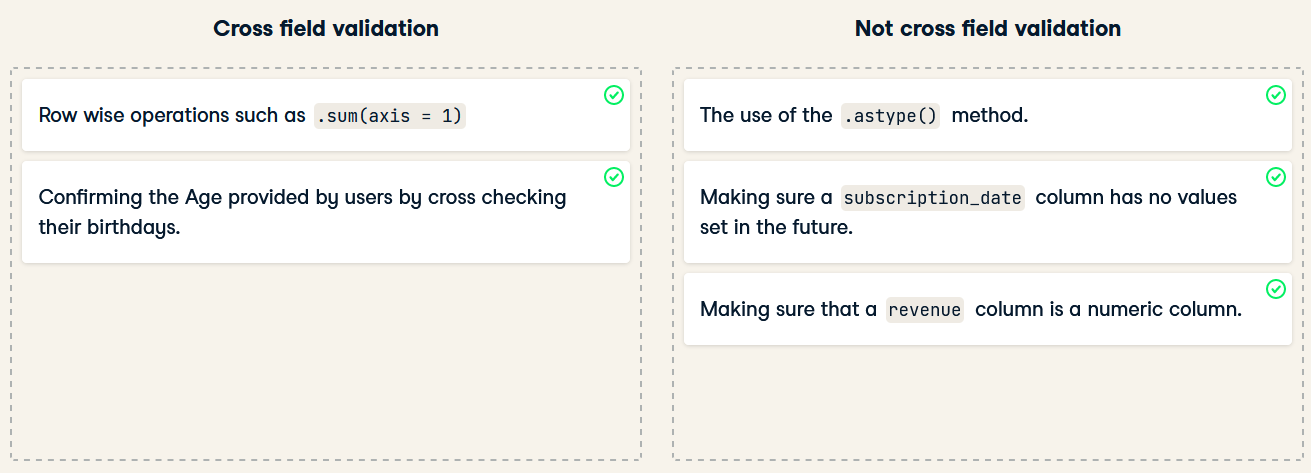

> **Best Practice**

E.g,
    # Store today's date and find ages
    today = dt.date.today()
    ages_manual = today.year - banking['birth_date'].dt.year

    # Find rows where age column == ages_manual
    age_equ = banking['age'] == ages_manual

    # Store consistent and inconsistent data
    consistent_ages = banking[age_equ]
    inconsistent_ages = banking[~age_equ]

    # Store consistent and inconsistent data
    print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

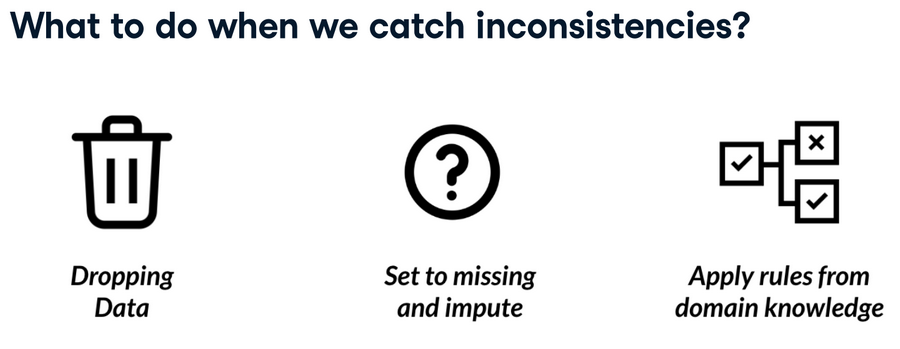

## Completeness

**Missing values** can be represented as `NA`, `nan`, `0`, ...

Type of missing values
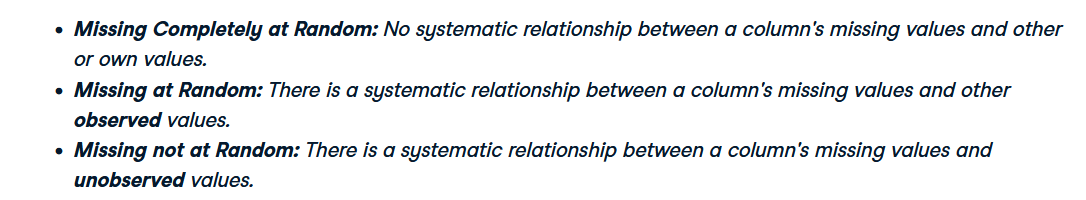

### Identify missing values

> **Best Practice**

Assuming the `inv_amount` column of `banking` has missing values for customers under 25. We can know that doing as follows:
1. Check for missing values
* `DataFrame.info()`: return non-null values of each column
* `DataFrame/Series.isnull().sum()`: return the number of null values


2. Check for systematic missingness

* Use `DataFrame.describe()` to check for systematic relationship between columns with missing values & other columns

      # Isolate missing and non missing values of inv_amount
      missing_investors = banking[banking['inv_amount'].isna()]
      investors = banking[~banking['inv_amount'].isna()]

      # Check for systematic relationship
      display(investors.describe())
      display(missing_investors.describe())

* Use `missingno` library to visualize missing values

      import missingno as msno

* Use `msno.matrix(DataFrame)` 

      # Print number of missing values in banking
      print(banking.isna().sum())

      # Sort banking by age and visualize
      banking_sorted = banking.sort_values('age')
      msno.matrix(banking_sorted)
      plt.show()

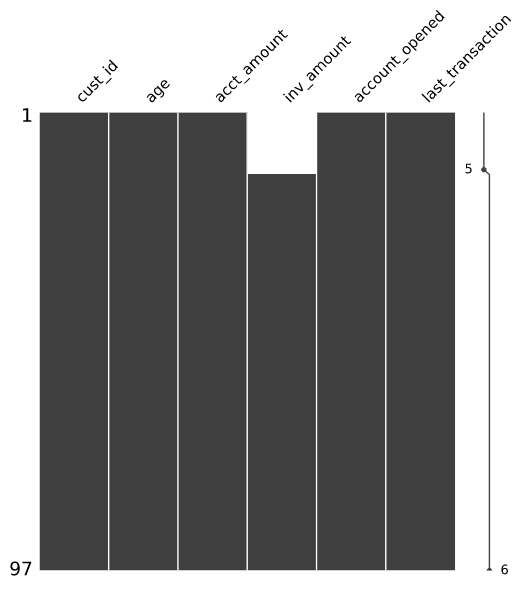

**Note**

> `isnull()` behaves the same as `isna()`

### Deal with missing data

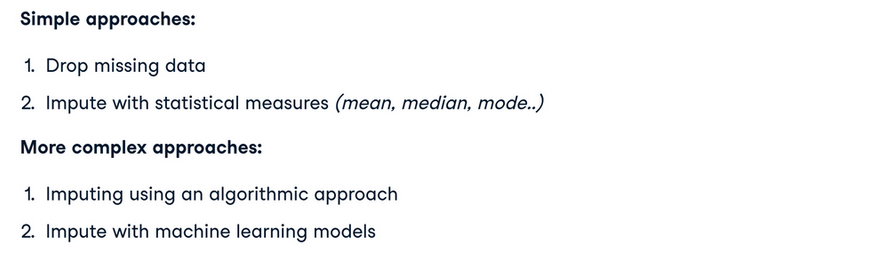

> **Best Practice**

* Use `DataFrame.dropna`() to drop rows with missing values

  - `axis` = 0: dropping rows, `axis` = 1: dropping columns
  - `subset`: labels along the chosen axis to consider

* Use `DataFrame.fillna()` to replace missing values with new values

      # Drop missing values of cust_id
      banking_fullid = banking.dropna(subset = ['cust_id'])

      # Compute estimated acct_amount
      acct_imp = banking_fullid['inv_amount']*5

      # Impute missing acct_amount with corresponding acct_imp
      banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

      # Print number of missing values
      print(banking_imputed.isna().sum())